# Airline Passenger Satisfaction:

In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [6]:
df=pd.read_csv(r"C:\Users\Sumanth_Kavety\Downloads\Airline Passenger Satisfaction.csv")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


## Data Exploration:

In [7]:
#Checking the number of rows and columns
df.shape

(25976, 25)

In [8]:
#Creating multiple copies of the existing dataset
dc=df.copy()
de=df.copy()

In [10]:
df.head(16)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [11]:
df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
25975,25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [12]:
df.sample(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
20085,20085,77795,Female,Loyal Customer,64,Personal Travel,Eco,874,2,3,...,5,5,2,3,4,5,2,22,12.0,neutral or dissatisfied
17581,17581,25537,Female,Loyal Customer,26,Personal Travel,Eco,516,3,5,...,4,3,5,2,4,3,4,44,51.0,neutral or dissatisfied
2832,2832,101271,Female,disloyal Customer,30,Business travel,Business,978,0,0,...,4,5,4,4,5,4,4,18,6.0,satisfied


In [13]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [14]:
#Checking the details of non null values, columns and it's Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [15]:
#Checking the statistics of numerical data
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


## Univariate Analysis (Categorical data):

In [16]:
df["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [18]:
#Checking how much % of disloyal customers are there in the given data.
df["Customer Type"].value_counts(normalize=True)*100

Loyal Customer       81.525254
disloyal Customer    18.474746
Name: Customer Type, dtype: float64

In [19]:
df["Class"].value_counts()

Business    12495
Eco         11564
Eco Plus     1917
Name: Class, dtype: int64

<Axes: ylabel='Class'>

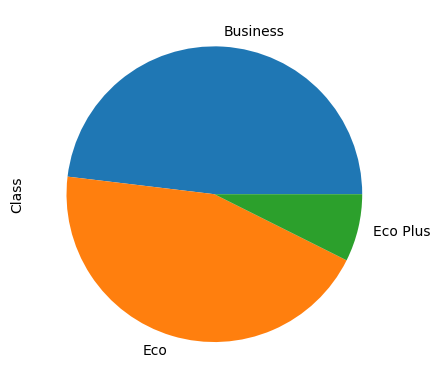

In [21]:
df["Class"].value_counts().plot(kind="pie")

In [49]:
df["satisfaction"].value_counts()

neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64

<Axes: xlabel='satisfaction', ylabel='count'>

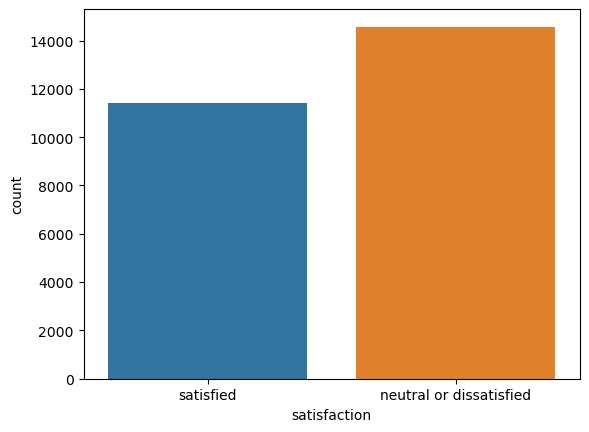

In [50]:
sns.countplot(x = df["satisfaction"])

<Axes: xlabel='Class', ylabel='count'>

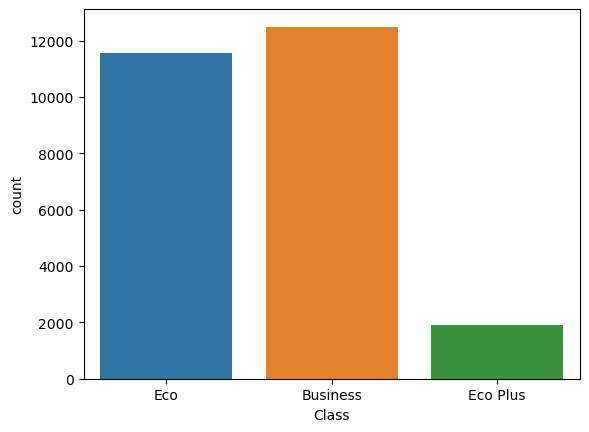

In [23]:
#Total number of customers in the business class are more compared to other 2 classes.
sns.countplot(x = df["Class"])

## Univariate Analysis (Numerical Data):

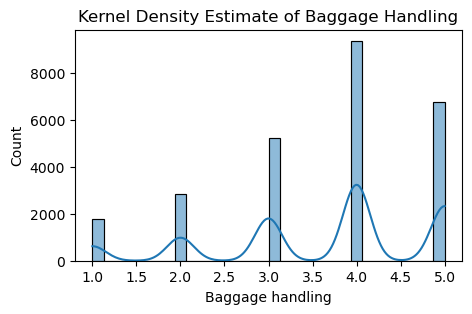

In [28]:
plt.figure(figsize=(5,3))
sns.histplot(df["Baggage handling"],kde=True)
plt.title("Kernel Density Estimate of Baggage Handling")
plt.show()

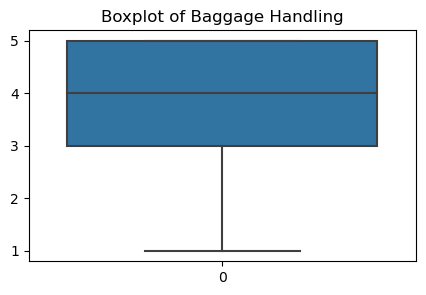

In [30]:
#No Outliers found with respect to Baggage Handling
plt.figure(figsize=(5,3))
sns.boxplot(df["Baggage handling"])
plt.title("Boxplot of Baggage Handling")
plt.show()

C:\Users\Sumanth_Kavety\AppData\Local\Temp\ipykernel_28832\370054599.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Baggage handling"])


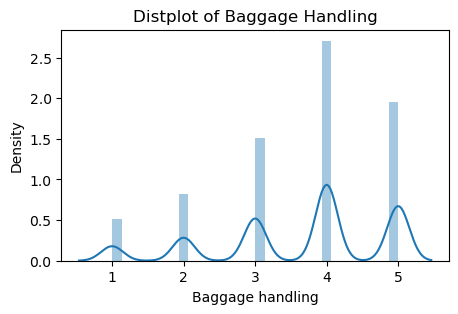

In [31]:
plt.figure(figsize=(5,3))
sns.distplot(df["Baggage handling"])
plt.title("Distplot of Baggage Handling")
plt.show()

C:\Users\Sumanth_Kavety\AppData\Local\Temp\ipykernel_28832\2387164956.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Flight Distance"])


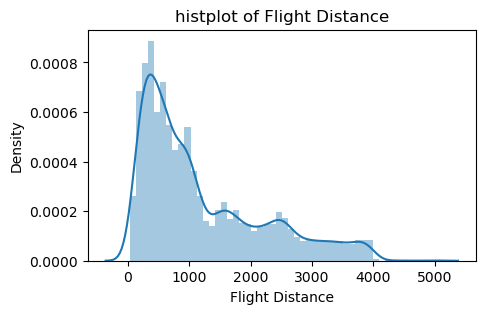

In [33]:
plt.figure(figsize=(5,3))
sns.distplot(df["Flight Distance"])
plt.title("histplot of Flight Distance")
plt.show()

In [34]:
df["Flight Distance"].mean()

1193.788458577148

In [35]:
df["Flight Distance"].median()

849.0

In [ ]:
#From the above mean and median it's clear that there are outliers in the Flight distance column.

## Bivariate Analysis (Categorical Data):

In [43]:
#Checking how many female passengers are loyal and disloyal customers:
pd.crosstab(df["Gender"],df["Customer Type"])
#Ans: Total 10,598 female passengers are loyal and 2,574 passengers are disloyal.
#Ans: Total 10,579 female passengers are loyal and 2,225 passengers are disloyal.

Customer Type,Loyal Customer,disloyal Customer
Gender,,
Female,10598,2574
Male,10579,2225


<Figure size 500x300 with 0 Axes>

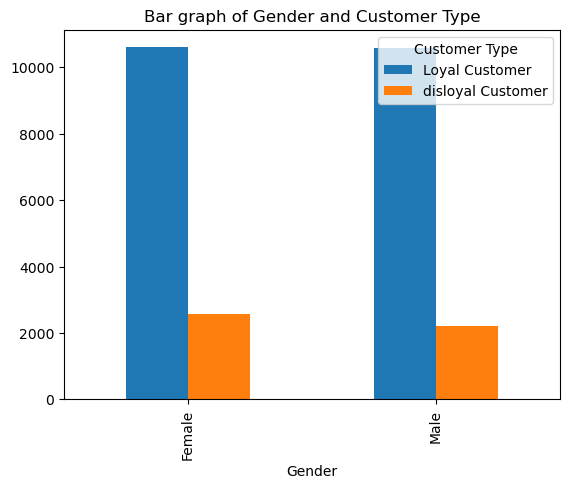

In [48]:
plt.figure(figsize=(5,3))
pd.crosstab(df["Gender"],df["Customer Type"]).plot(kind="bar")
plt.title("Bar graph of Gender and Customer Type")
plt.show()

## Bivariate Analysis (Numerical Data):

In [59]:
#Storing all the numerical data in one variable

df_numeric = df.select_dtypes(include=["float64","int64"])
df_numeric

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,19556,52,160.0,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0
1,1,90035,36,2863.0,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0
2,2,12360,20,192.0,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0
3,3,77959,44,3377.0,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0
4,4,36875,49,1182.0,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,34,526.0,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0
25972,25972,71167,23,646.0,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0
25973,25973,37675,17,828.0,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0
25974,25974,90086,14,1127.0,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0


In [66]:
e = df_numeric.corr()
e

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Unnamed: 0,1.000000,0.006946,-0.007964,-0.002635,-0.003085,-0.003962,-0.002011,-0.001360,-0.010858,-0.000254,-0.005602,-0.012927,0.001180,-0.004194,0.000349,0.002773,-0.008069,-0.005058,-0.005948,-0.002974
id,0.006946,1.000000,0.010211,0.096365,-0.030303,-0.002502,0.010389,0.001843,-0.006789,0.055767,0.049212,-0.001078,0.056544,0.041921,0.073085,0.079521,0.076587,0.020411,-0.009884,-0.029090
Age,-0.007964,0.010211,1.000000,0.099396,0.009242,0.032449,0.013565,0.003308,0.023841,0.202058,0.154507,0.068998,0.054977,0.033299,-0.049863,0.025388,-0.059083,0.048418,-0.004334,-0.007400
Flight Distance,-0.002635,0.096365,0.099396,1.000000,0.005273,-0.014124,0.063384,0.008747,0.057518,0.215482,0.159627,0.138214,0.118414,0.137676,0.071962,0.076071,0.066920,0.106039,0.003527,0.000159
Inflight wifi service,-0.003085,-0.030303,0.009242,0.005273,1.000000,0.349137,0.710684,0.347790,0.122306,0.459366,0.116991,0.201782,0.113658,0.159699,0.118199,0.046046,0.108419,0.125768,-0.010078,-0.012277
Departure/Arrival time convenient,-0.003962,-0.002502,0.032449,-0.014124,0.349137,1.000000,0.440230,0.458439,-0.016006,0.080937,-0.001926,-0.022326,0.060982,0.003373,0.065684,0.082461,0.067804,-0.007670,-0.000238,-0.001345
Ease of Online booking,-0.002011,0.010389,0.013565,0.063384,0.710684,0.440230,1.000000,0.465514,0.025141,0.408003,0.022811,0.044715,0.039988,0.116754,0.040685,-0.000108,0.035769,0.010974,-0.001062,-0.003161
Gate location,-0.001360,0.001843,0.003308,0.008747,0.347790,0.458439,0.465514,1.000000,-0.009694,0.006993,-0.000721,-0.000340,-0.031606,-0.002428,-0.004395,-0.054954,-0.005129,-0.014195,0.008039,0.007776
Food and drink,-0.010858,-0.006789,0.023841,0.057518,0.122306,-0.016006,0.025141,-0.009694,1.000000,0.229601,0.580970,0.627265,0.050688,0.035870,0.037617,0.076775,0.039992,0.659253,-0.025957,-0.028309
Online boarding,-0.000254,0.055767,0.202058,0.215482,0.459366,0.080937,0.408003,0.006993,0.229601,1.000000,0.415414,0.279391,0.149430,0.120354,0.084583,0.203309,0.071972,0.320912,-0.021037,-0.025875


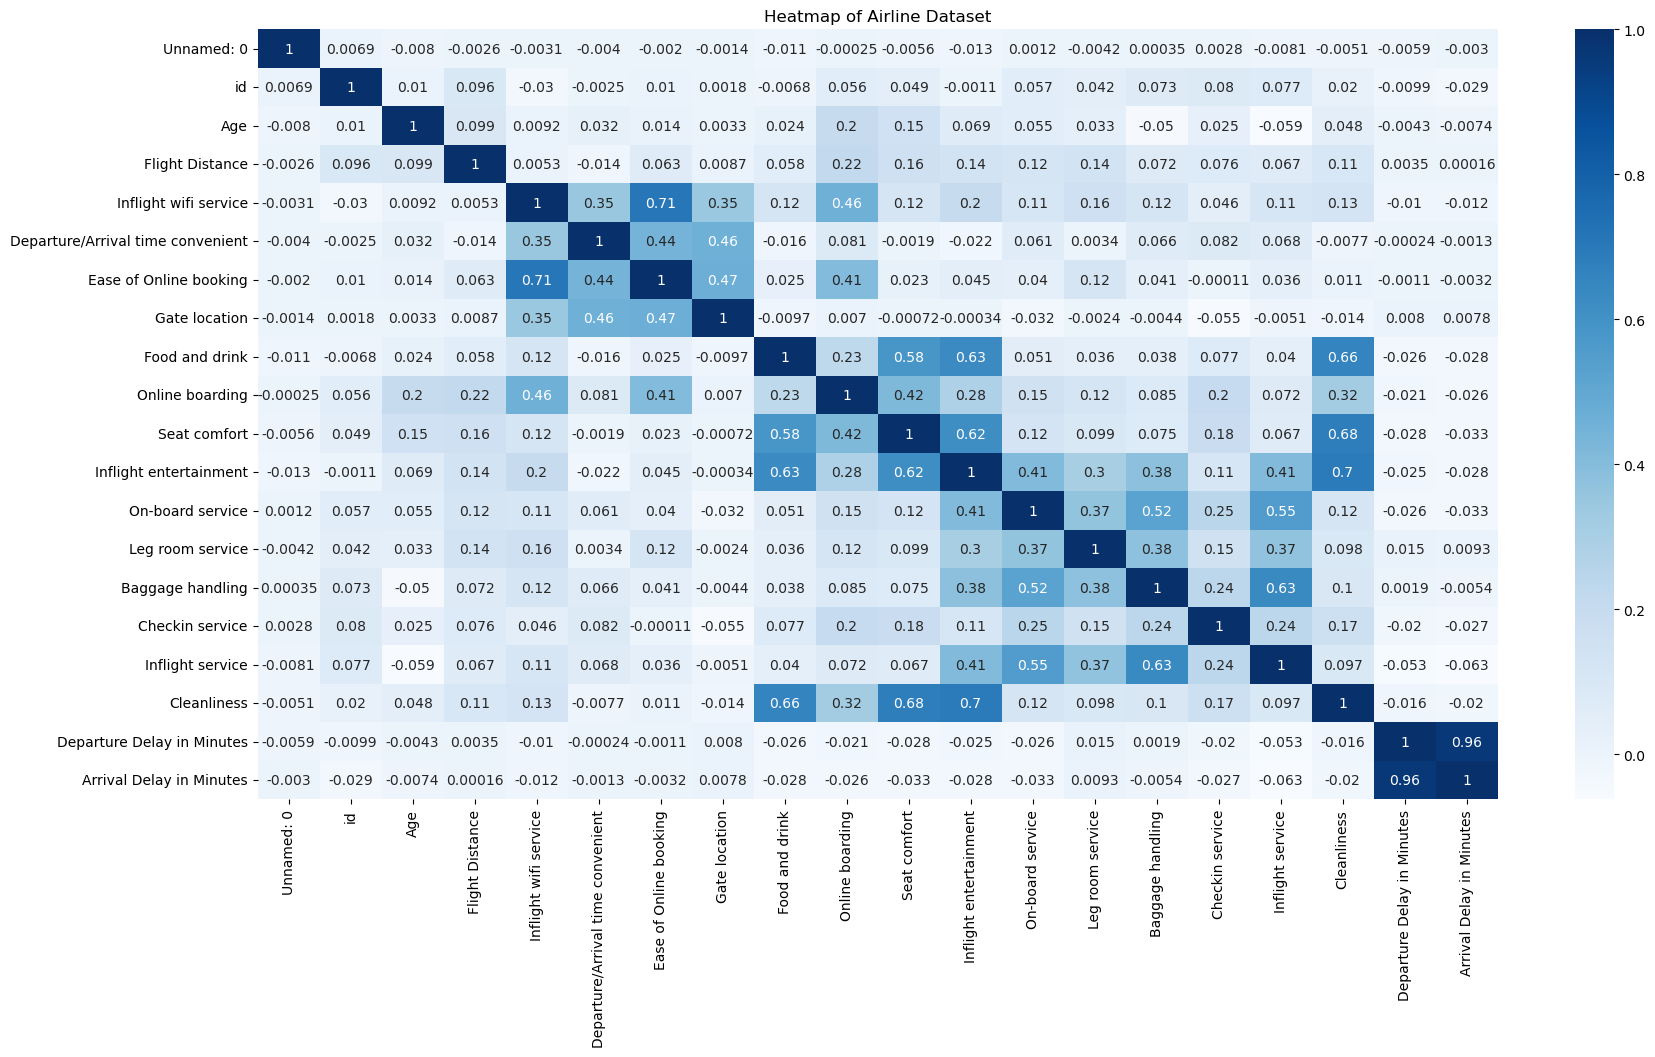

In [74]:
plt.figure(figsize=(20,10))
sns.heatmap(e,cmap="Blues",annot=True)
plt.title("Heatmap of Airline Dataset")
plt.show()

## Bivariate Analysis (Numerical and Categorical Data):

<Axes: title={'center': 'Flight Distance'}, xlabel='Type of Travel'>

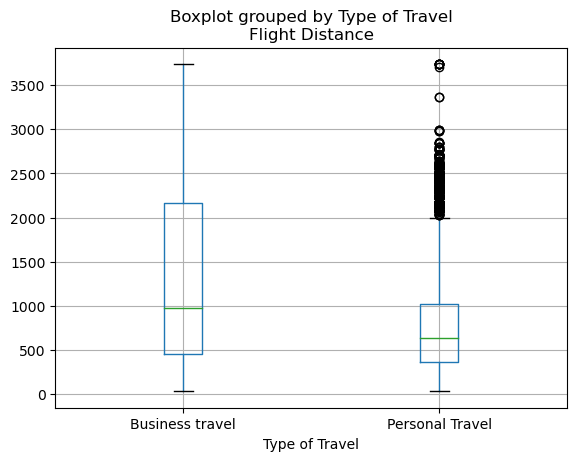

In [81]:
df.boxplot(column="Flight Distance", by="Type of Travel")
#Flight distance has got outliers according to this box plot.

<Axes: title={'center': 'Inflight wifi service'}, xlabel='Class'>

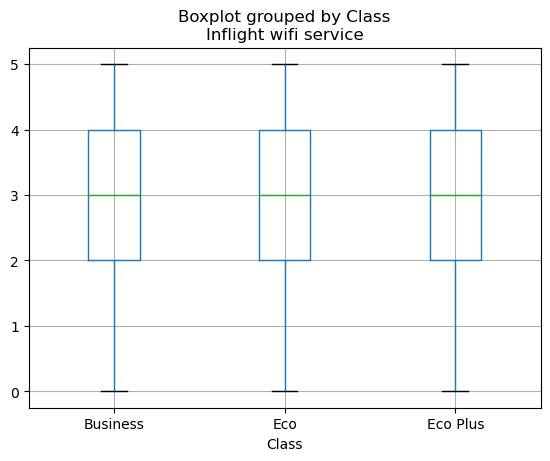

In [82]:
df.boxplot(column="Inflight wifi service",by="Class")
#No outliers detected from the boxplot.

## Data Cleaning:

In [86]:
df.isna().sum()

Unnamed: 0                            0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [92]:
#Checking the % of the missing values
df.isna().sum()*100/len(df)

Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes           0.000000
Arrival Delay in Minutes          

In [93]:
#Removing the null values from "Arrival Delay in Minutes"
df["Arrival Delay in Minutes"].mean()

14.74085660217047

In [95]:
#Replacing all the null values with the mean values.
df["Arrival Delay in Minutes"]=df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].mean())

In [96]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [91]:
#Removed all the irrelevent features.
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160.0,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863.0,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192.0,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377.0,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182.0,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526.0,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646.0,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828.0,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127.0,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


## Dummy Variable Creation:

#### Why Dummy Variable Creation? -> Most of the Machine learning algorithms won't be able to detect the categorical data that's why we convert the to the numerical data.

In [97]:
#Creating dummy variables for the Gender and dropping out the Gender Column.
Gender=pd.get_dummies(df['Gender'],drop_first=True)

In [98]:
df=pd.concat([df,Gender], axis=1)
df.drop(['Gender'], axis=1, inplace=True)

df.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Male
0,Loyal Customer,52,Business travel,Eco,160.0,5,4,3,4,3,...,5,5,5,2,5,5,50,44.0,satisfied,0
1,Loyal Customer,36,Business travel,Business,2863.0,1,1,3,1,5,...,4,4,4,3,4,5,0,0.0,satisfied,0
2,disloyal Customer,20,Business travel,Eco,192.0,2,0,2,4,2,...,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,1
3,Loyal Customer,44,Business travel,Business,3377.0,0,0,0,2,3,...,1,1,1,3,1,4,0,6.0,satisfied,1
4,Loyal Customer,49,Business travel,Eco,1182.0,2,3,4,3,4,...,2,2,2,4,2,4,0,20.0,satisfied,0


In [103]:
#Creating dummy variables for the Customer Type and dropping out the Customer Type Column.
CustomerType = pd.get_dummies(df['Customer Type'],drop_first=True)

In [106]:
df=pd.concat([df,CustomerType], axis=1)
df.drop(['Customer Type'], axis=1, inplace=True)

df.head()

,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Male,disloyal Customer,disloyal Customer
0,52,Business travel,Eco,160.0,5,4,3,4,3,4,...,5,2,5,5,50,44.0,satisfied,0,0,0
1,36,Business travel,Business,2863.0,1,1,3,1,5,4,...,4,3,4,5,0,0.0,satisfied,0,0,0
2,20,Business travel,Eco,192.0,2,0,2,4,2,2,...,3,2,2,2,0,0.0,neutral or dissatisfied,1,1,1
3,44,Business travel,Business,3377.0,0,0,0,2,3,4,...,1,3,1,4,0,6.0,satisfied,1,0,0
4,49,Business travel,Eco,1182.0,2,3,4,3,4,1,...,2,4,2,4,0,20.0,satisfied,0,0,0


In [108]:
TypeofTravel = pd.get_dummies(df['Type of Travel'],drop_first=True)
df=pd.concat([df,TypeofTravel], axis=1)
df.drop(['Type of Travel'], axis=1, inplace=True)

df.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Male,disloyal Customer,disloyal Customer,Personal Travel
0,52,Eco,160.0,5,4,3,4,3,4,3,...,2,5,5,50,44.0,satisfied,0,0,0,0
1,36,Business,2863.0,1,1,3,1,5,4,5,...,3,4,5,0,0.0,satisfied,0,0,0,0
2,20,Eco,192.0,2,0,2,4,2,2,2,...,2,2,2,0,0.0,neutral or dissatisfied,1,1,1,0
3,44,Business,3377.0,0,0,0,2,3,4,4,...,3,1,4,0,6.0,satisfied,1,0,0,0
4,49,Eco,1182.0,2,3,4,3,4,1,2,...,4,2,4,0,20.0,satisfied,0,0,0,0


In [109]:
Class = pd.get_dummies(df['Class'],drop_first=True)
df=pd.concat([df,Class], axis=1)
df.drop(['Class'], axis=1, inplace=True)

df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Male,disloyal Customer,disloyal Customer,Personal Travel,Eco,Eco Plus
0,52,160.0,5,4,3,4,3,4,3,5,...,5,50,44.0,satisfied,0,0,0,0,1,0
1,36,2863.0,1,1,3,1,5,4,5,4,...,5,0,0.0,satisfied,0,0,0,0,0,0
2,20,192.0,2,0,2,4,2,2,2,2,...,2,0,0.0,neutral or dissatisfied,1,1,1,0,1,0
3,44,3377.0,0,0,0,2,3,4,4,1,...,4,0,6.0,satisfied,1,0,0,0,0,0
4,49,1182.0,2,3,4,3,4,1,2,2,...,4,0,20.0,satisfied,0,0,0,0,1,0


In [111]:
df.describe().columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Male', 'disloyal Customer', 'disloyal Customer', 'Personal Travel',
       'Eco', 'Eco Plus'],
      dtype='object')

In [113]:
##Finding the SKEW and Max_Z score after the outlier treatment:
from scipy import stats
for X in df.describe().columns:
    print('The skewness and Max_Z-Score value for {} is {} and {} respectively'.format(X,df[X].skew(),np.max(abs(stats.zscore(df[X])))))

The skewness and Max_Z-Score value for Age is -8.798600323780104e-05 and 2.998206881389616 respectively
The skewness and Max_Z-Score value for Flight Distance is 1.0641651457850538 and 2.5774049804039927 respectively
The skewness and Max_Z-Score value for Inflight wifi service is 0.040791669532311225 and 2.0404604713984877 respectively
The skewness and Max_Z-Score value for Departure/Arrival time convenient is -0.32468453025506344 and 1.987041606780916 respectively
The skewness and Max_Z-Score value for Ease of Online booking is -0.020655269462228863 and 1.9511135900753718 respectively
The skewness and Max_Z-Score value for Gate location is -0.055798123933928946 and 1.5777967221953801 respectively
The skewness and Max_Z-Score value for Food and drink is -0.17022924477255083 and 2.4148697888032165 respectively
The skewness and Max_Z-Score value for Online boarding is -0.46921756218739574 and 2.406227596244139 respectively
The skewness and Max_Z-Score value for Seat comfort is -0.4980474

C:\Users\Sumanth_Kavety\AppData\Local\anaconda\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Sumanth_Kavety\AppData\Local\anaconda\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


## Outlier Treatment:

In [116]:
df['Flight Distance'].quantile([0.05, 0.25, 0.5, 0.9,0.95,0.96,0.97,0.98,0.99,1.0])

0.05     177.0
0.25     414.0
0.50     849.0
0.90    2758.5
0.95    3363.0
0.96    3491.0
0.97    3641.0
0.98    3739.0
0.99    3739.0
1.00    3739.0
Name: Flight Distance, dtype: float64

In [115]:
col_sel=['Flight Distance']
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))


iqr_capping(df, col_sel, 1.5)

In [117]:
#Finding the SKEW and Max_Z score after the outlier treatment:
for X in df.describe().columns:
    print('The skewness and Max_Z-Score value for {} is {} and {} respectively'.format(X,df[X].skew(),np.max(abs(stats.zscore(df[X])))))

The skewness and Max_Z-Score value for Age is -8.798600323780104e-05 and 2.998206881389616 respectively
The skewness and Max_Z-Score value for Flight Distance is 1.0641651457850538 and 2.5774049804039927 respectively
The skewness and Max_Z-Score value for Inflight wifi service is 0.040791669532311225 and 2.0404604713984877 respectively
The skewness and Max_Z-Score value for Departure/Arrival time convenient is -0.32468453025506344 and 1.987041606780916 respectively
The skewness and Max_Z-Score value for Ease of Online booking is -0.020655269462228863 and 1.9511135900753718 respectively
The skewness and Max_Z-Score value for Gate location is -0.055798123933928946 and 1.5777967221953801 respectively
The skewness and Max_Z-Score value for Food and drink is -0.17022924477255083 and 2.4148697888032165 respectively
The skewness and Max_Z-Score value for Online boarding is -0.46921756218739574 and 2.406227596244139 respectively
The skewness and Max_Z-Score value for Seat comfort is -0.4980474

C:\Users\Sumanth_Kavety\AppData\Local\anaconda\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Sumanth_Kavety\AppData\Local\anaconda\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


# Model building and evaluation:

In [133]:
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc


random_state=42
np.random.seed(random_state)
import warnings
warnings.filterwarnings('ignore')

In [121]:
#Splitting the data into X (features) and Y (Target Variable)
X=df.drop(['satisfaction'],axis=1)
Y=df['satisfaction']

In [122]:
skf=StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, valid_index in skf.split(X,Y): 
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index] 
    y_train, y_valid = Y.iloc[train_index], Y.iloc[valid_index]
 #Dividing the train and the test data:
print('Shape of X_train :',X_train.shape)
print('Shape of X_valid :',X_valid.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_valid :',y_valid.shape)

Shape of X_train : (20781, 24)
Shape of X_valid : (5195, 24)
Shape of y_train : (20781,)
Shape of y_valid : (5195,)


In [126]:
#Fitting the Logistic Regression model
lr_model=LogisticRegression(random_state=100)
lr_model.fit(X_train,y_train)

LogisticRegression(random_state=100)

In [127]:
#Accuracy of model-
lr_score=lr_model.score(X_train,y_train)
print('Accuracy of lr_model :',lr_score)

Accuracy of lr_model : 0.8186324046003561


In [128]:
#Cross validation prediction of lr_model-
cv_predict=cross_val_predict(lr_model,X_valid,y_valid,cv=5)
#Cross validation score-
cv_score=cross_val_score(lr_model,X_valid,y_valid,cv=5)
print('cross val score :',np.average(cv_score))

cross val score : 0.8092396535129932


In [129]:
#Confusion Matrix:
cm=confusion_matrix(y_valid,cv_predict)
cm=pd.crosstab(y_valid,cv_predict)
cm

col_0,neutral or dissatisfied,satisfied
satisfaction,,
neutral or dissatisfied,2365,550
satisfied,441,1839


In [132]:
#Classification report:-
#Calculating the Precision, recall, F1-score
classification_scores=classification_report(y_valid,cv_predict)
print(classification_scores)

                         precision    recall  f1-score   support

neutral or dissatisfied       0.84      0.81      0.83      2915
              satisfied       0.77      0.81      0.79      2280

               accuracy                           0.81      5195
              macro avg       0.81      0.81      0.81      5195
           weighted avg       0.81      0.81      0.81      5195



## Smote (Synthetic minority OverSampling Technique): 

In [161]:
import imblearn
from imblearn.over_sampling import SMOTE
#SMOTE:-
sm = SMOTE(random_state=100, sampling_strategy=0.8)
#Generating synthetic data points
X_smote,y_smote=sm.fit_resample(X_train,y_train)
X_smote_v,y_smote_v=sm.fit_resample(X_valid,y_valid)

In [162]:
#Fitting the Smote Model:
smote=LogisticRegression(random_state=100)
smote.fit(X_smote,y_smote)

LogisticRegression(random_state=100)

In [163]:
smote_score=smote.score(X_smote,y_smote)
print('Accuracy of the smote_model :',smote_score)

Accuracy of the smote_model : 0.8184330918795273


In [164]:
#Cross validation score:-
cv_pred=cross_val_predict(smote,X_smote_v,y_smote_v,cv=5)
cv_score=cross_val_score(smote,X_smote_v,y_smote_v,cv=5)
print('Cross validation score :',np.average(cv_score))

Cross validation score : 0.8000735394253031


In [165]:
#Confusion Matrix of Smote Model:
cm=confusion_matrix(y_smote_v,cv_pred)
cm=pd.crosstab(y_smote_v,cv_pred)
cm

col_0,neutral or dissatisfied,satisfied
satisfaction,,
neutral or dissatisfied,2335,580
satisfied,469,1863
